In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2

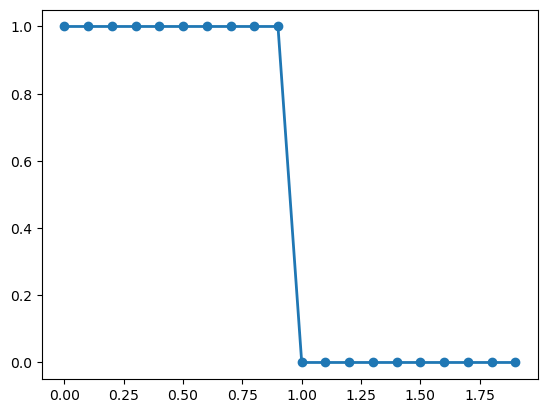

In [7]:
c = 1
dt = 0.05
dx = 0.1 

n_max = 20
x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2)

中心差分

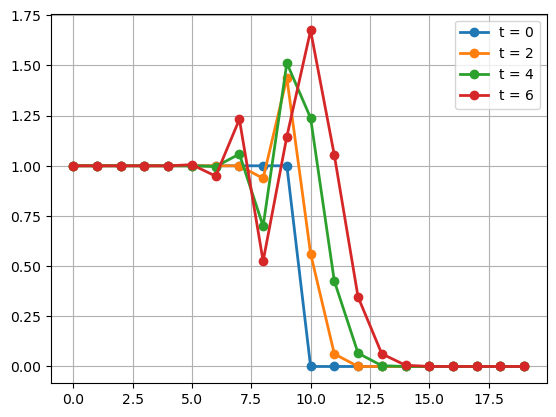

In [19]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - c * dt * (qold[j+1] - qold[j-1]) / (2.0 * dx)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

風上差分

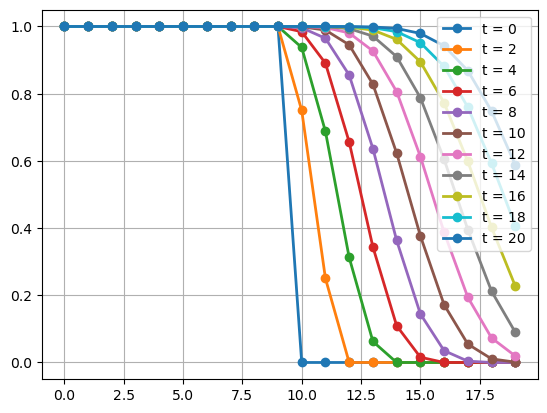

In [44]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max):
        q[j] = qold[j] - c * dt * (qold[j] - qold[j-1]) / dx
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

後退差分

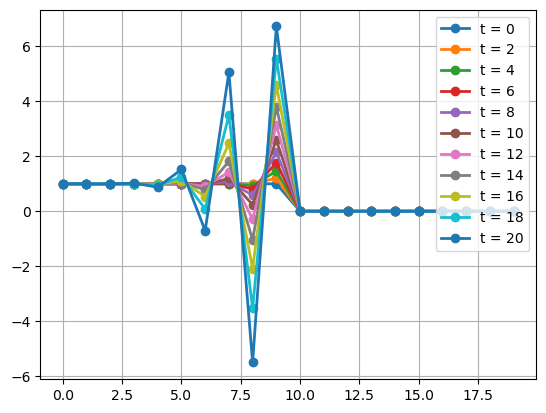

In [55]:
c = 1
dt = 0.1
dx = 1

n_max = 20
t_max = 20

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - c * dt * (qold[j+1] - qold[j]) / dx
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

Lax

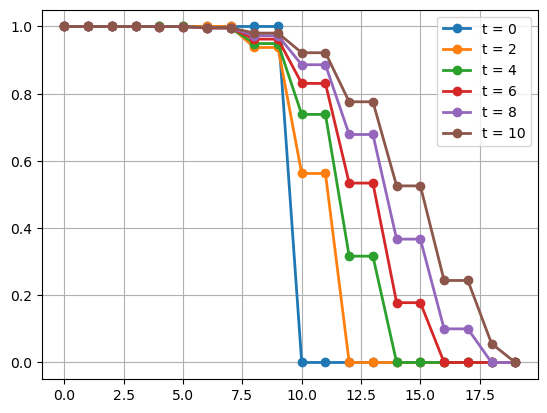

In [54]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 10

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = (qold[j+1] + qold[j-1]) / 2.0 - c/2 * dt/dx * (qold[j+1] - qold[j-1])
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

Lax-Wendroff

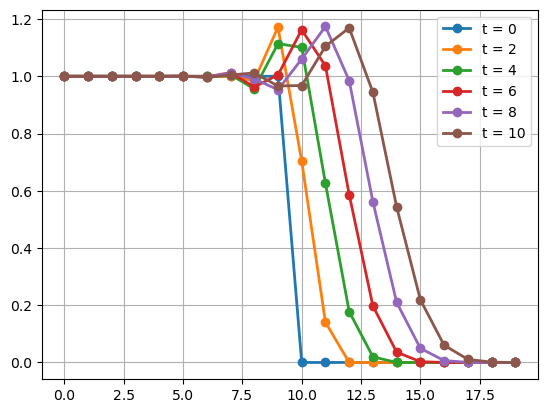

In [58]:
c = 1
dt = 0.5
dx = 1

n_max = 20
t_max = 10

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - c/2 * dt/dx * (qold[j+1] - qold[j-1]) + c**2 / 2 * (dt/dx)**2 * (qold[j+1] - 2*qold[j] + qold[j-1])
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()

### 2.3

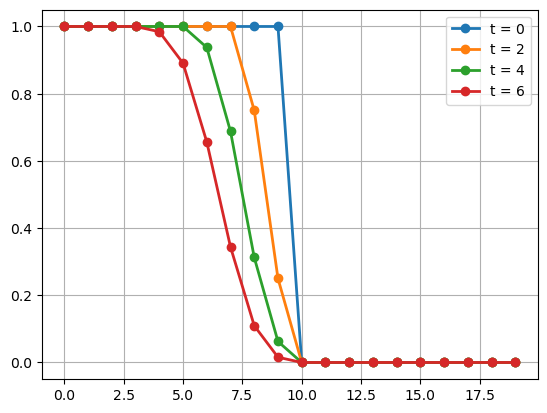

In [72]:
c = -1
dt = 0.5
dx = 1

n_max = 20
t_max = 6

x = np.linspace(0, (n_max-1)*dx, n_max)
q = np.zeros(n_max)

q[0:int(n_max/2)] = 1.0

plt.plot(x, q, marker='o', lw=2, label=f't = {0}')

for t in range(1, t_max+1):
    qold = q.copy()
    for j in range(1, n_max-1):
        q[j] = qold[j] - dt * ((c + abs(c))/2 * (qold[j] - qold[j-1])/dx + (c - abs(c))/2 * (qold[j+1] - qold[j])/dx)
    
    if (t % 2 == 0):
        plt.plot(x, q, marker='o', lw=2, label=f't = {t}')

plt.grid()
plt.legend(loc='upper right')
plt.show()